LOAD RAW DATA

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATASET OVERVIEW

In [7]:
df.shape

(891, 12)

DATA TYPE ANALYSIS

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

DATASET STRUCTURE 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


STATISTICAL SUMMARY OF NUMERICAL FEATURE

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


MISSING VALUES

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

VISUALIZING MISSING DATA

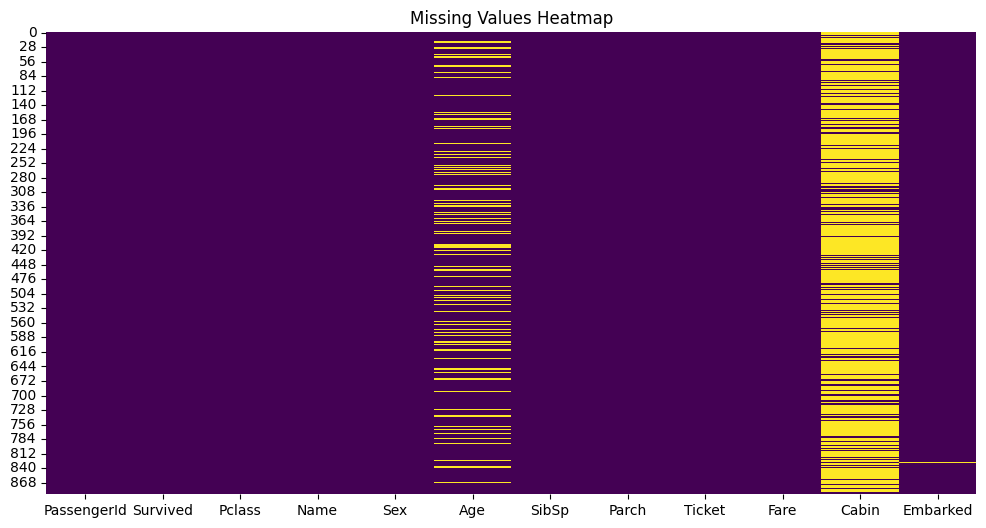

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


NUMERICAL FEATURE DISTRIBUTION

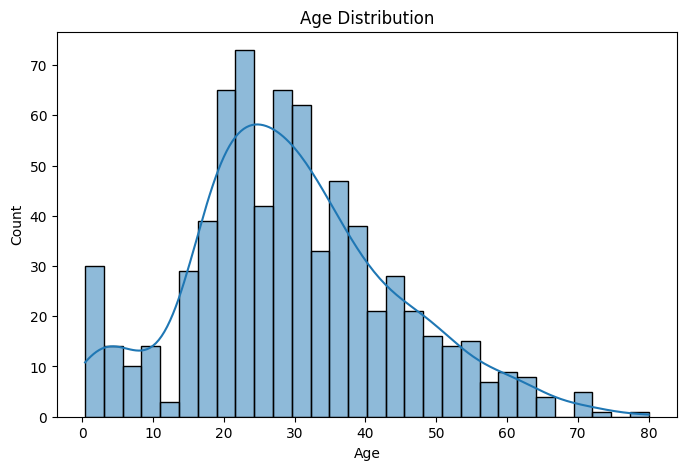

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



FARE DISTRIBUTION

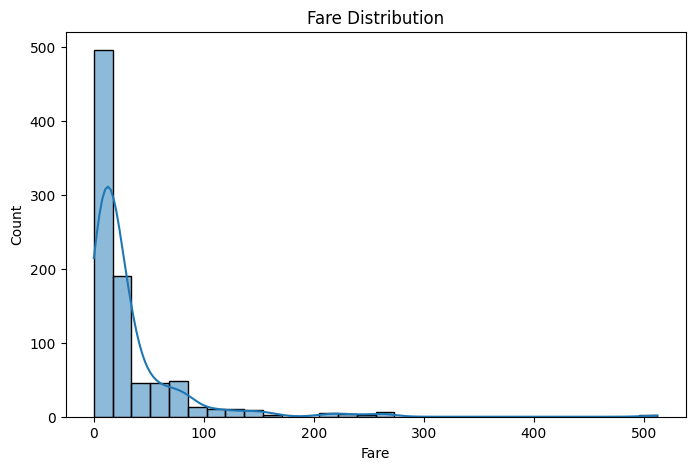

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


CATEGORICAL FEATURE ANALYSIS

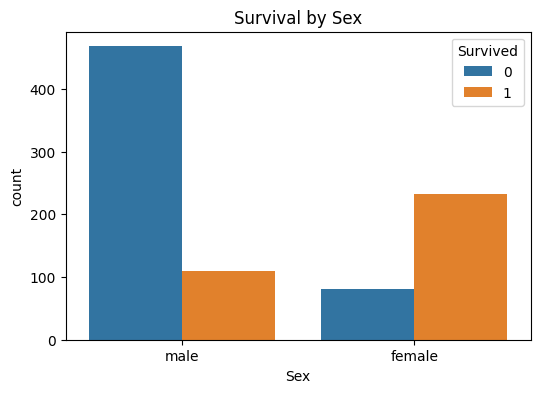

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()




CORRELATION ANALYSIS

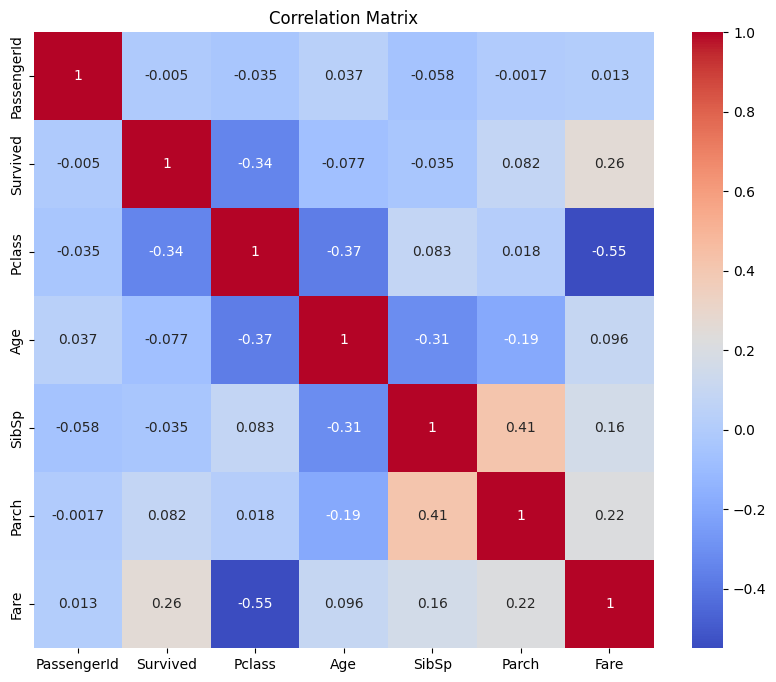

In [ ]:
import numpy as np
new_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



OUTLIER ANALYSIS

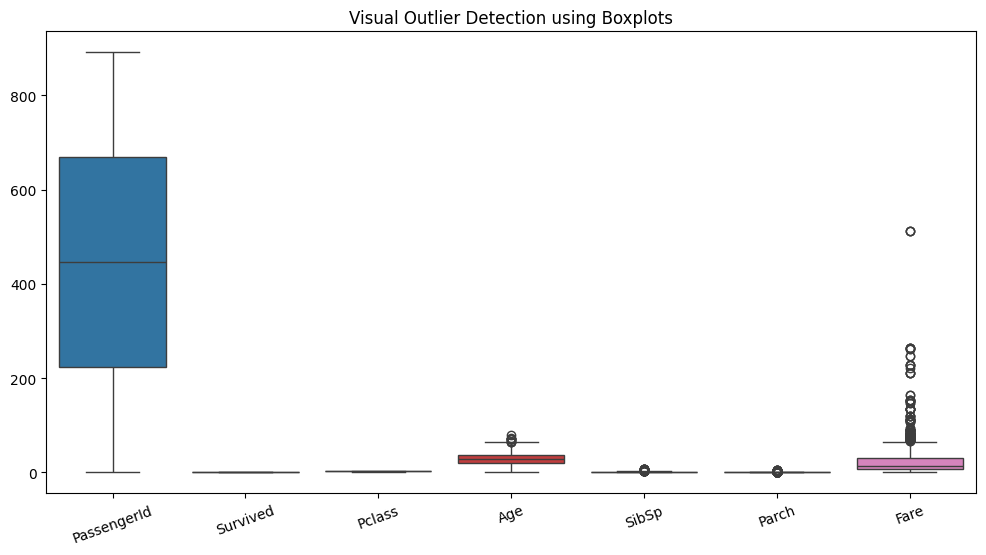

In [13]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df)
plt.title("Visual Outlier Detection using Boxplots")
plt.xticks(rotation=20)
plt.show()


DUPLICATE RECORD ANALYSIS

In [ ]:
df.duplicated().sum()
df[df.duplicated()]
#no duplicate rows exist


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


DATA INCONSISTENCIES


In [ ]:
df["Sex"].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
df["Pclass"].value_counts().head(10)
# df["Ticket"].value_counts().head(10)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

TARGET DISTRIBUTION

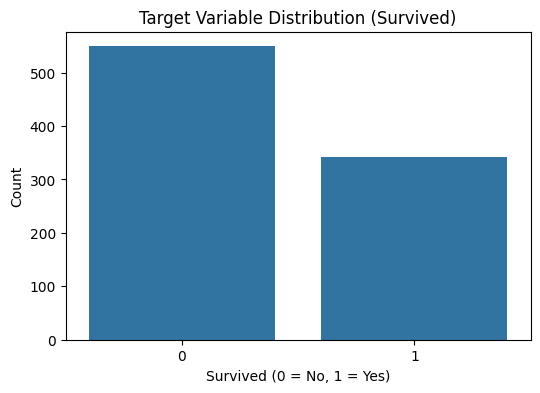

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Target Variable Distribution (Survived)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
